# Predicting Score of Student based on number of hours studied

<h3> Imporing csv file using pandas</h3>

In [30]:
import pandas as pd
import numpy as np
stud_data = pd.read_csv("http://bit.ly/w-data")

In [31]:
stud_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
stud_data.shape

(25, 2)

In [33]:
stud_data.size

50

In [34]:
stud_data.keys()

Index(['Hours', 'Scores'], dtype='object')

In [35]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h4> There are no null values, hence data is clean </h4>

In [36]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [37]:
from scipy import stats
print('correlation and pvalue\n', stats.stats.spearmanr(stud_data['Hours'], stud_data['Scores']))

correlation and pvalue
 SpearmanrResult(correlation=0.9718907151012602, pvalue=6.034634315166879e-16)


<h4> As pvalue is less than 0.05, there is significant correlation between Hours and Scores</h4>

<h2> Visualization of data </h2>

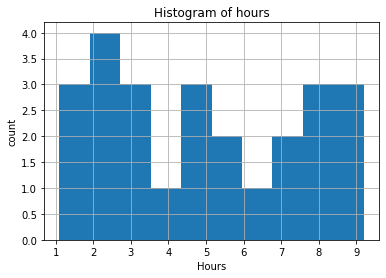

In [38]:
# histogram of hours
import matplotlib.pyplot as plt
stud_data['Hours'].hist()
plt.xlabel('Hours')
plt.ylabel('count')
plt.title('Histogram of hours')
plt.show()

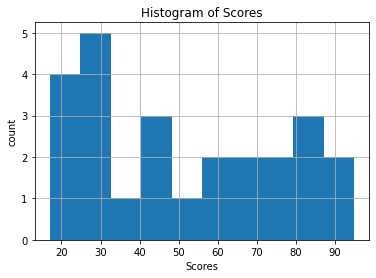

In [39]:
# histogram of Scores
stud_data['Scores'].hist()
plt.xlabel('Scores')
plt.ylabel('count')
plt.title('Histogram of Scores')
plt.show()

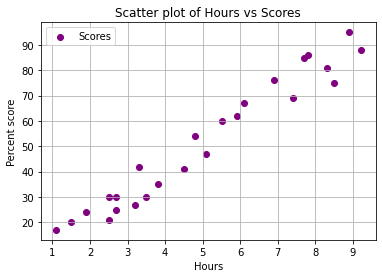

In [40]:
#Scatter plot of hours and scores
plt.scatter(stud_data['Hours'],stud_data['Scores'], color = 'purple' , label = "Scores")
plt.xlabel('Hours')
plt.ylabel('Percent score')
plt.title('Scatter plot of Hours vs Scores')
plt.legend()
plt.grid()
plt.show()

<h4> From the Scatter plot, we can conclude that both the variables are directly proportional to eachother</h4> 

<h2> Data Preparation </h2>

In [41]:
from sklearn.model_selection import train_test_split
X = stud_data.drop(columns = ['Scores'])
Y = stud_data['Scores']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

<h2> Model Training </h2>

In [42]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)


LinearRegression()

<h2> Prediction </h2>

In [43]:
y_predict = linear.predict(x_test)

<h2> Checking accuracy of model </h2>

In [44]:
print("Acuracy - ",linear.score(x_test,y_test)*100)

Acuracy -  95.21617209469052


In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
19,69,75.917967
6,88,94.343057
5,20,15.524618
16,30,25.760778
21,54,49.303949


In [46]:
print("value of intercept : ", linear.intercept_)

value of intercept :  0.1703761381588791


In [47]:
print("Value of coefficients : ",linear.coef_)

Value of coefficients :  [10.23616093]


<h2> Plotting Linear Regression Graph </h2>

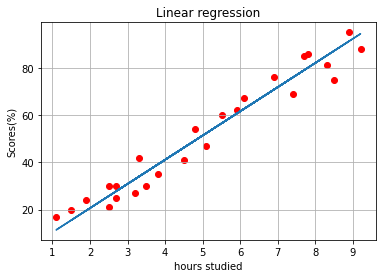

In [48]:

line = linear.coef_*X+linear.intercept_

# Plotting for the test data
plt.scatter(X, Y, color = 'red')
plt.plot(X, line)
plt.grid()
plt.xlabel('hours studied')
plt.ylabel('Scores(%)')
plt.title('Linear regression')
plt.show()

<h2> Predicted percentage score of student if studies for 9.25 hours </h2>

In [49]:
hr = 9.25
array_hrs = np.array(hr)
Pred = linear.predict(Time)
print("No of Hours = {}".format(array_hrs))
print("Predicted Score = {}".format(Pred[0]))

No of Hours = 9.25
Predicted Score = 94.85486477119801


<h2> Evaluating the model </h2>

In [50]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
print('mean square error is : ', sqrt(mean_squared_error(y_test,y_predict)))

mean square error is :  5.443263406663762
